In [4]:
import cv2
import mediapipe as mp


In [5]:
def check_organ_position(organ_positions):
    """
    Check the position of an organ based on available positions.
    
    Args:
    organ_positions (dict): A dictionary with keys 'left', 'right', 'top', 'bottom' 
                            representing the positions of the organ in the image.
                            The values can be coordinates or any identifying label.
    
    Returns:
    str: The detected position of the organ.
    """
    if 'left' in organ_positions and organ_positions['left']:
        return f"Organ is on the left at position {organ_positions['left']}"
    elif 'right' in organ_positions and organ_positions['right']:
        return f"Organ is on the right at position {organ_positions['right']}"
    elif 'top' in organ_positions and organ_positions['top']:
        return f"Organ is on the top at position {organ_positions['top']}"
    elif 'bottom' in organ_positions and organ_positions['bottom']:
        return f"Organ is on the bottom at position {organ_positions['bottom']}"
    else:
        return "Organ position is not found."

# MediaPipe setup
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def get_pose_landmarks(image):
    """
    Detects pose landmarks in an image using MediaPipe Pose.
    
    Args:
    image (ndarray): The input image.
    
    Returns:
    dict: A dictionary with keys 'left', 'right', 'top', 'bottom' and their corresponding positions.
    """
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    if not results.pose_landmarks:
        return {'left': None, 'right': None, 'top': None, 'bottom': None}
    
    landmarks = results.pose_landmarks.landmark
    height, width, _ = image.shape
    
    organ_positions = {
        'left': (int(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x * width), int(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y * height)),
        'right': (int(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * width), int(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * height)),
        'top': (int(landmarks[mp_pose.PoseLandmark.NOSE].x * width), int(landmarks[mp_pose.PoseLandmark.NOSE].y * height)),
        'bottom': (int(landmarks[mp_pose.PoseLandmark.LEFT_HIP].x * width), int(landmarks[mp_pose.PoseLandmark.LEFT_HIP].y * height))
    }
    
    return organ_positions


Organ is on the left at position (448, 288)


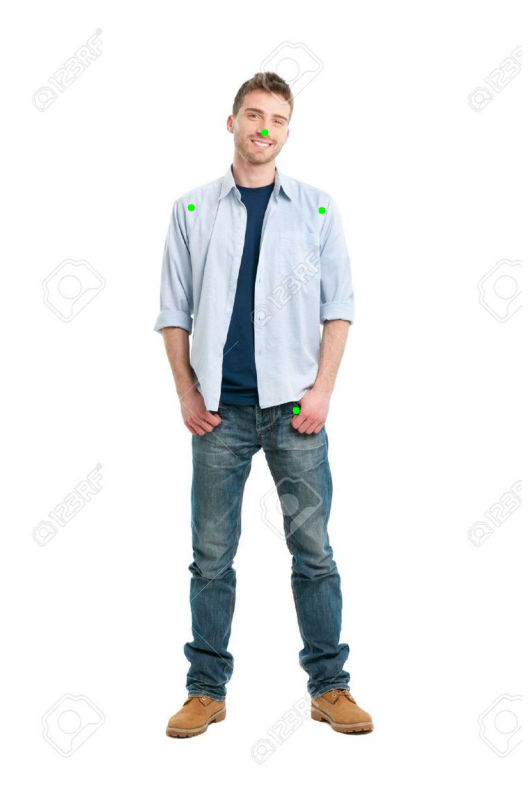

In [7]:
def process_image(image_path):
    # Load an image
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Could not read the image.")
        return
    
    # Get organ positions
    organ_positions = get_pose_landmarks(image)
    position = check_organ_position(organ_positions)
    
    print(position)

    # Draw landmarks and connections
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if organ_positions:
        for pos in organ_positions.values():
            if pos:
                cv2.circle(image_rgb, pos, 5, (0, 255, 0), -1)
    
    return image_rgb

# Example usage
image_path = 'test_img/f1222fabfee360b54be2a84e7fb7d07b.jpg'  # Replace with the path to your image
image_result = process_image(image_path)

if image_result is not None:
    from matplotlib import pyplot as plt

    plt.figure(figsize=(10, 10))
    plt.imshow(image_result)
    plt.axis('off')
    plt.show()
